In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load & Filter
df = pd.read_csv('lagos_houses_prices.csv')
df_clean = df[(df['cleaned_price'] <= 2_000_000_000) & (df['cleaned_price'] >= 10_000_000) & (df['Bedrooms'] >= 1)].copy()

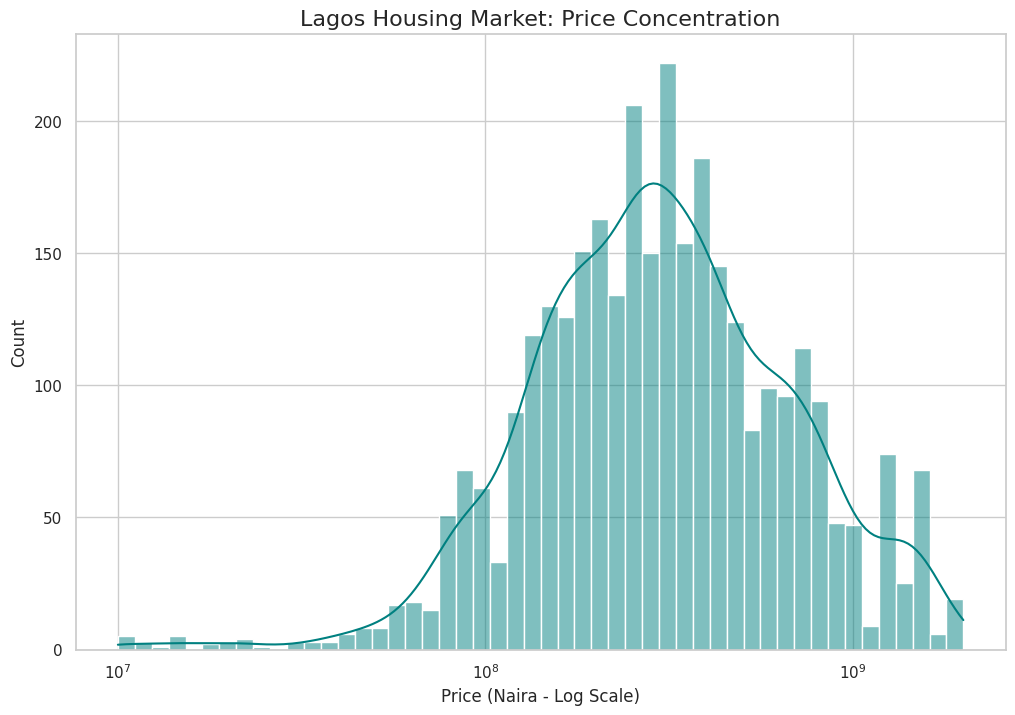

In [3]:
# Set Style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Chart 1: Price Distribution
plt.figure()
sns.histplot(df_clean['cleaned_price'], kde=True, bins=50, color='teal', log_scale=True)
plt.title('Lagos Housing Market: Price Concentration', fontsize=16)
plt.xlabel('Price (Naira - Log Scale)')
plt.savefig('viz_price_distribution.png')

/tmp/ipykernel_48208/467953334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Neighborhood_Tier', y='cleaned_price', palette='viridis')


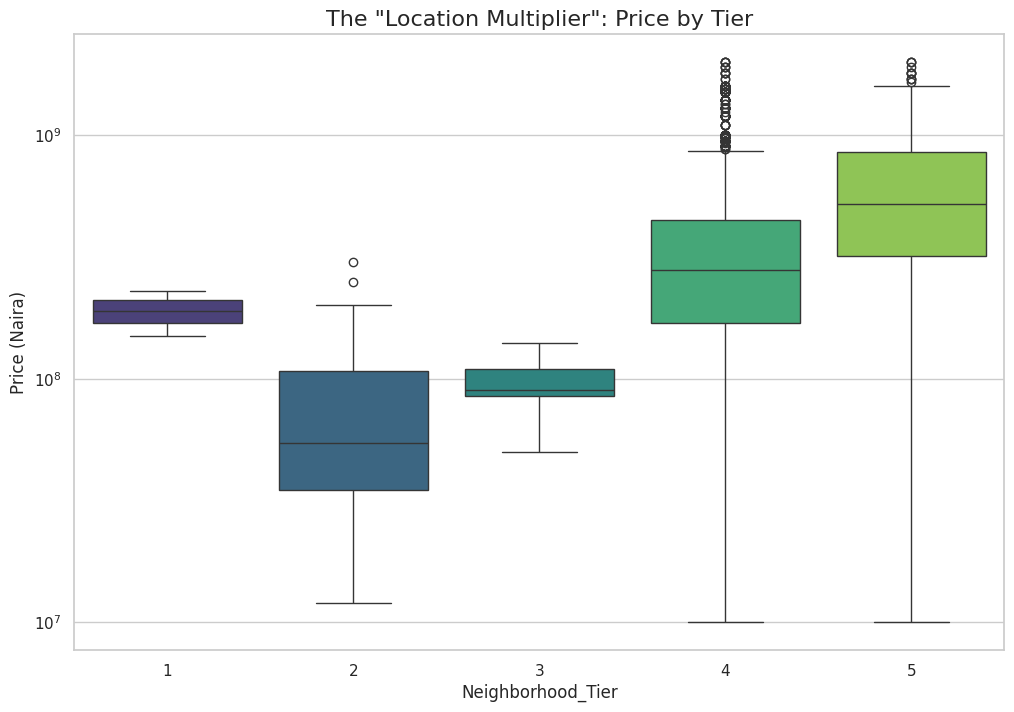

In [4]:
# Chart 2: The Tier System
plt.figure()
sns.boxplot(data=df_clean, x='Neighborhood_Tier', y='cleaned_price', palette='viridis')
plt.yscale('log')
plt.title('The "Location Multiplier": Price by Tier', fontsize=16)
plt.ylabel('Price (Naira)')
plt.savefig('viz_price_by_tier.png')

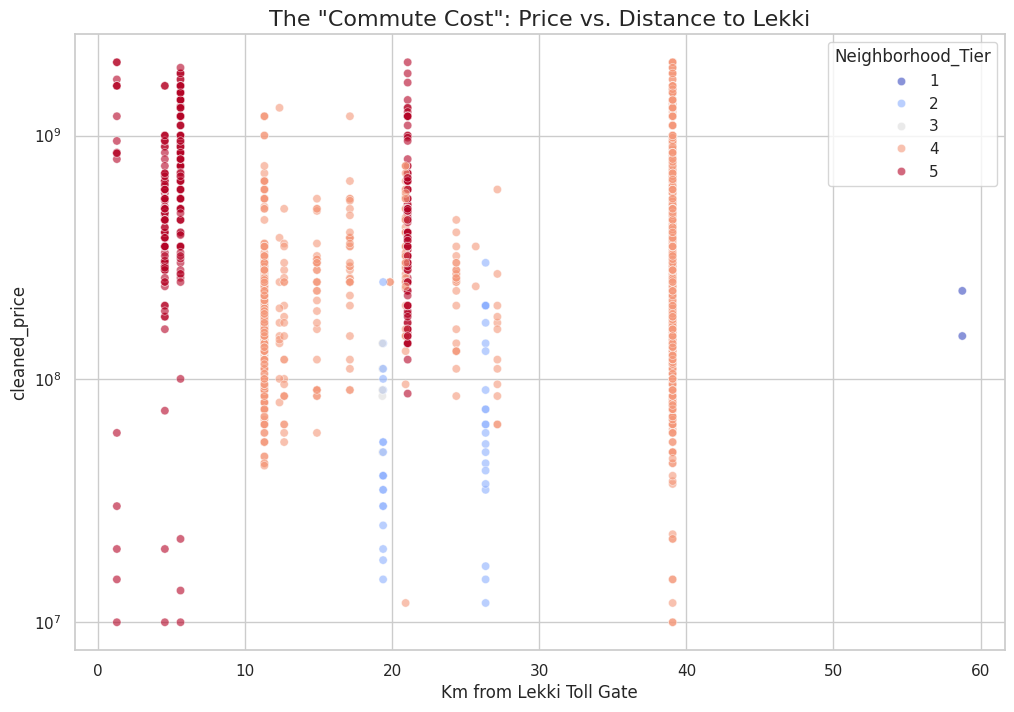

In [5]:
# Chart 3: Distance Decay
plt.figure()
sns.scatterplot(data=df_clean, x='dist_to_lekki', y='cleaned_price', hue='Neighborhood_Tier', palette='coolwarm', alpha=0.6)
plt.yscale('log')
plt.title('The "Commute Cost": Price vs. Distance to Lekki', fontsize=16)
plt.xlabel('Km from Lekki Toll Gate')
plt.savefig('viz_distance_gradient.png')

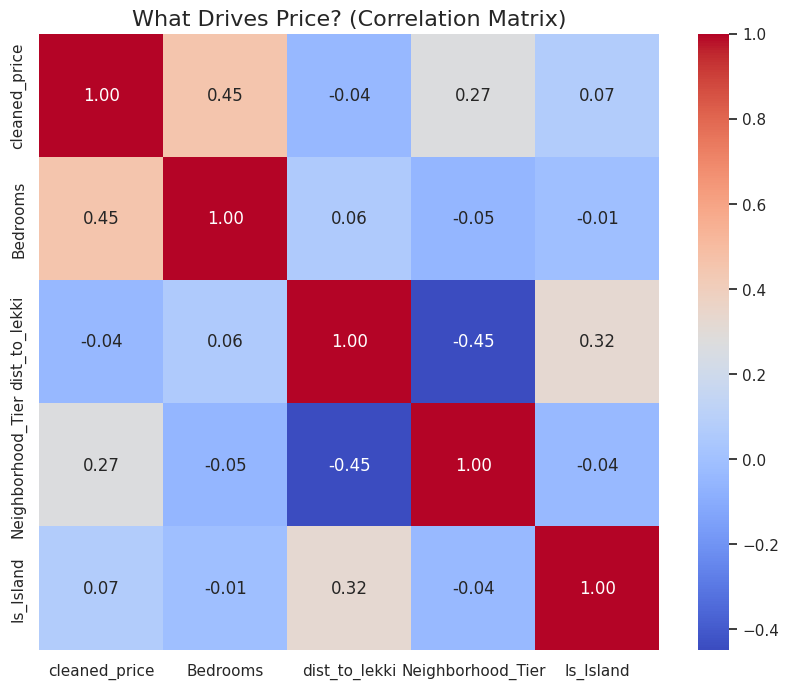

In [6]:
# Chart 4: Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_cols = ['cleaned_price', 'Bedrooms', 'dist_to_lekki', 'Neighborhood_Tier', 'Is_Island']
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('What Drives Price? (Correlation Matrix)', fontsize=16)
plt.savefig('viz_correlation_heatmap.png')

/tmp/ipykernel_48208/3356452696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Bedrooms', y='cleaned_price', palette='Blues')


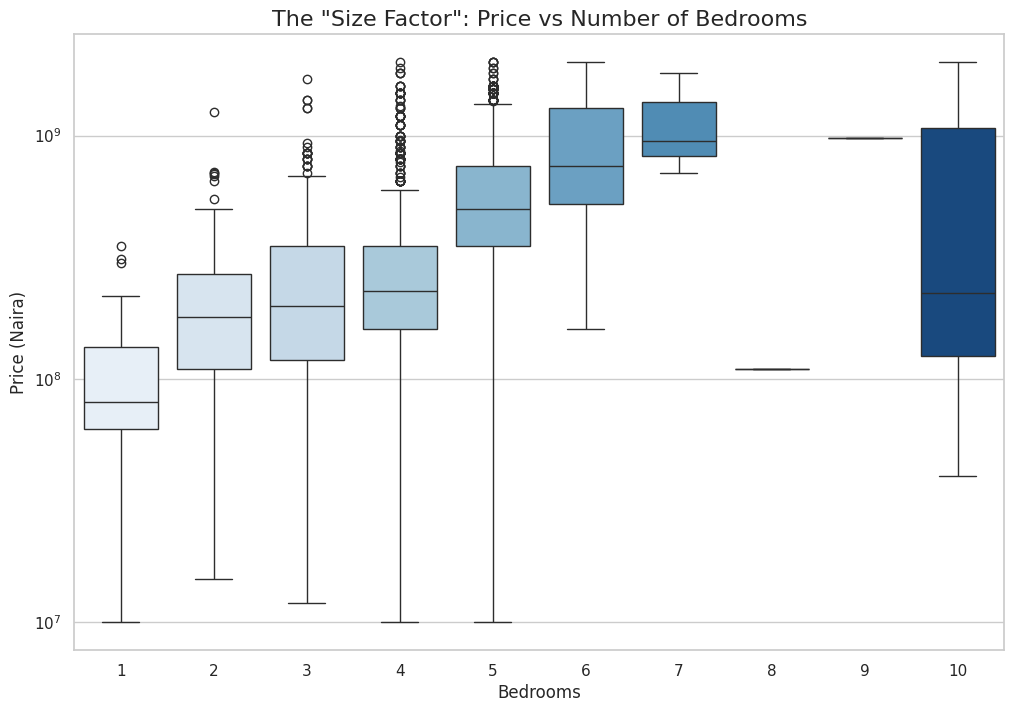

In [7]:
# Chart 5: Price vs Bedrooms
plt.figure()
sns.boxplot(data=df_clean, x='Bedrooms', y='cleaned_price', palette='Blues')
plt.yscale('log')
plt.title('The "Size Factor": Price vs Number of Bedrooms', fontsize=16)
plt.ylabel('Price (Naira)')
plt.savefig('viz_price_vs_bedrooms.png')

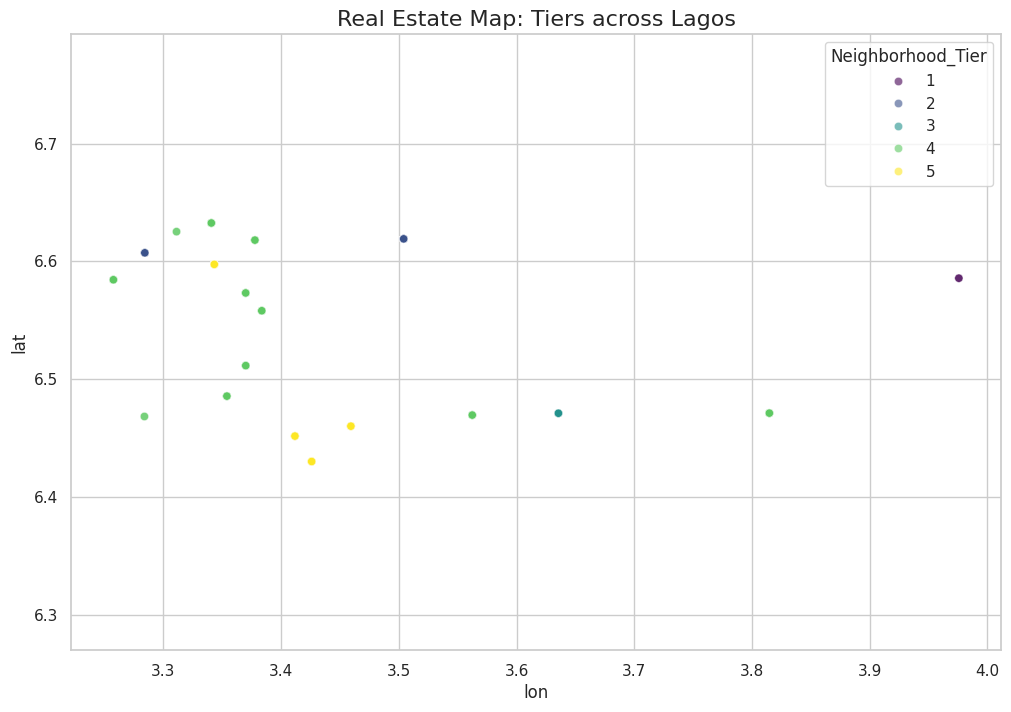

In [8]:
# Chart 6: Geospatial Map
plt.figure()
# Filter lat/lon to zoom in on Lagos
map_df = df_clean[(df_clean['lat'] > 6.3) & (df_clean['lat'] < 6.8) & 
                  (df_clean['lon'] > 3.2) & (df_clean['lon'] < 4.0)]
sns.scatterplot(data=map_df, x='lon', y='lat', hue='Neighborhood_Tier', palette='viridis', alpha=0.6)
plt.title('Real Estate Map: Tiers across Lagos', fontsize=16)
plt.axis('equal')
plt.savefig('viz_geospatial_map.png')



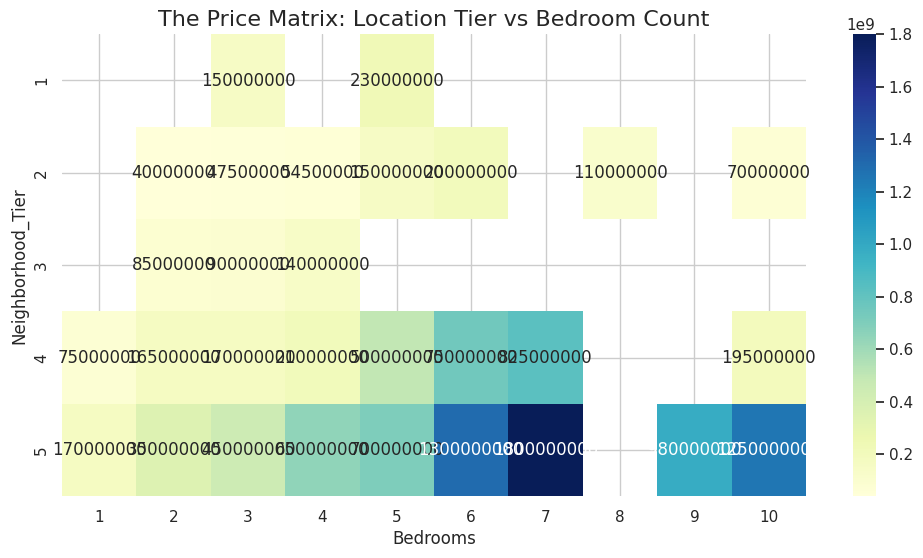

In [9]:
# Chart 7: The Price Matrix (Heatmap)
plt.figure(figsize=(12, 6))
pivot = df_clean.pivot_table(index='Neighborhood_Tier', columns='Bedrooms', values='cleaned_price', aggfunc='median')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('The Price Matrix: Location Tier vs Bedroom Count', fontsize=16)
plt.savefig('viz_tier_bedroom_heatmap.png')



/tmp/ipykernel_48208/1564000309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Is_Island', y='cleaned_price', palette='muted')


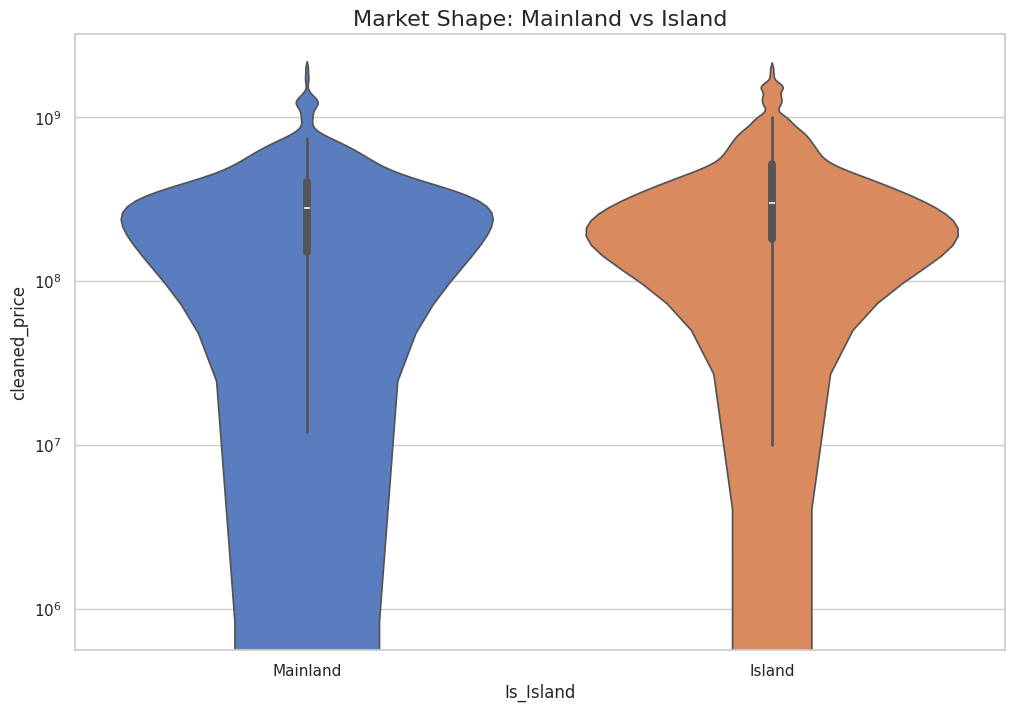

In [10]:
# Chart 8: Island vs Mainland
plt.figure()
sns.violinplot(data=df_clean, x='Is_Island', y='cleaned_price', palette='muted')
plt.xticks([0, 1], ['Mainland', 'Island'])
plt.yscale('log')
plt.title('Market Shape: Mainland vs Island', fontsize=16)
plt.savefig('viz_island_mainland.png')